**Target:**

- Adding step lr to stabilize training and get better optimization. Reducing LR in intervals of 5 epochs by one-tenth.
- Adding one more layer at the end after gap, helped including more non-linearity and still less than 8k parameters.

**Results:**

- Parameters: 7.98k
- Best Training Accuracy: 99.01
- Best Test Accuracy: 99.41

**Analysis:**

- Step LR did wonders. Reached our goal in epoch 12 and epoch 15.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net7
from utils import train, test

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net7().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 12, 10, 10]             864
             ReLU-12           [-1, 12, 10, 10]               0
      BatchNorm2d-13           [-1, 12, 10, 10]              24
          Dropout-14           [-1, 12,

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                                transforms.Resize((28, 28)),
                                transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [5]:
model = Net7().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0975 Batch_id=468 Accuracy=89.89: 100%|██████████| 469/469 [00:34<00:00, 13.66it/s]


Test set: Average loss: 0.0632, Accuracy: 9809/10000 (98.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1820 Batch_id=468 Accuracy=97.33: 100%|██████████| 469/469 [00:29<00:00, 15.71it/s]


Test set: Average loss: 0.0442, Accuracy: 9869/10000 (98.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1162 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:29<00:00, 15.97it/s]


Test set: Average loss: 0.0353, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1420 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:30<00:00, 15.62it/s]


Test set: Average loss: 0.0340, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0966 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:29<00:00, 15.94it/s]


Test set: Average loss: 0.0302, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=0.0173 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:32<00:00, 14.32it/s]


Test set: Average loss: 0.0214, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.0201 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:30<00:00, 15.21it/s]


Test set: Average loss: 0.0220, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.0749 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:29<00:00, 15.70it/s]


Test set: Average loss: 0.0209, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.0718 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:29<00:00, 16.02it/s]


Test set: Average loss: 0.0201, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0117 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:29<00:00, 15.69it/s]


Test set: Average loss: 0.0199, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 11


Train: Loss=0.1132 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:29<00:00, 15.96it/s]


Test set: Average loss: 0.0193, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 12


Train: Loss=0.0213 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:29<00:00, 15.82it/s]


Test set: Average loss: 0.0199, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.0114 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:29<00:00, 16.08it/s]


Test set: Average loss: 0.0199, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.0445 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:29<00:00, 16.05it/s]


Test set: Average loss: 0.0198, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.0465 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:29<00:00, 15.87it/s]


Test set: Average loss: 0.0199, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-05.


Text(0.5, 1.0, 'Test Accuracy')

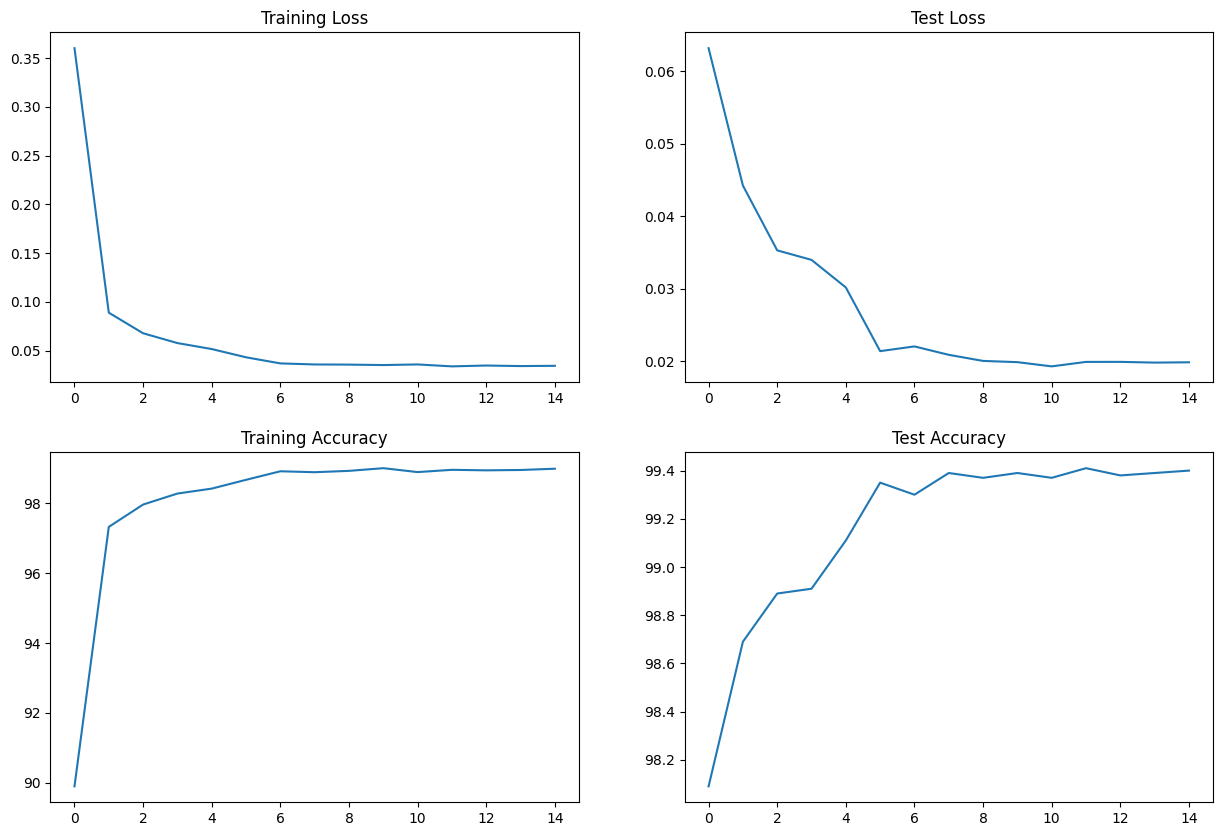

In [6]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [7]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  99.00833333333334
best test accuracy :  99.41


In [8]:
print("best train loss : ", min(train_losses))
print("best test loss : ", min(test_losses))

best train loss :  0.033834599842652996
best test loss :  0.019298966513201593
